# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **economic activity or measures** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **economic activity or measures**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **economic activity or measures**?  For this category you might look at the inputs or outputs to the given economy, or major changes in the economy compared to other regions.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

## Data region changed! Please see detailed information in the conclusion.

Data source: https://www.inegi.org.mx/app/descarga/

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [21]:
df1 = pd.read_excel('data/enoe_00.xlsx', header= None, skiprows=4)
#set the first row as header
df1.columns = list(df1.iloc[0,:])
df1.drop(df1.index[0:1], axis=0, inplace=True)
#drop the not needed columns and columns with missing values
df1.drop(columns=['cve_entidad', 'cve_municipio', 'id_indicador', 'unidad_medida', '2021/t2', '2021/t3'], inplace=True)
#Converting values to integers
col_list = list(df1)
df1[col_list[3:]] = df1[col_list[3:]].astype(int)
#Mean of the year quarters
years = np.arange(2005,2021)
x=3
y=7
for i in years:
    df1[i] = df1[col_list[x:y]].mean(axis=1).astype(int)
    x+=4
    y+=4
#Droping year quarters
df1.drop(col_list[3:], axis=1, inplace=True)
df1 = df1[df1['desc_entidad'] != 'Estados Unidos Mexicanos']
df1.head()

,desc_entidad,desc_municipio,indicador,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
36,Aguascalientes,Estatal,Población no económicamente activa - 15 años y...,304361,310216,310144,325565,341683,343836,351783,363815,366096,370251,372237,376766,398182,396952,409101,432570
37,Aguascalientes,Estatal,Población no económicamente activa disponible ...,34895,49979,57400,59333,54934,47762,45242,43870,47318,49823,48089,40237,41875,57555,59577,66817
38,Aguascalientes,Estatal,Población no económicamente activa no disponib...,269466,260237,252743,266232,286748,296074,306540,319945,318778,320428,324147,336529,356307,339397,349523,365753
39,Aguascalientes,Estatal,Población ocupada con ingresos de hasta un sal...,30797,31360,30476,26156,31854,34252,30209,37367,38864,32856,31600,39222,35191,42068,45878,57327
40,Aguascalientes,Estatal,Población ocupada con ingresos de hasta un sal...,12987,12861,12244,9839,12742,14139,13311,15418,14970,12495,11780,13711,11672,13202,15669,22123


In [22]:
#Gruuping by indicator and summing the data
df1 = df1.groupby(['indicador']).sum()
df1.reset_index(inplace=True)
df1.head()

,indicador,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Población desocupada - 15 años y más,1552353,1604046,1673280,1825674,2582998,2596157,2582804,2522020,2559763,2508631,2293781,2085194,1863505,1833709,1997593,2426711
1,"Población desocupada - 15 años y más, hombres",927542,952099,979205,1113072,1610546,1644443,1617764,1560592,1571198,1551541,1393203,1276707,1114844,1099913,1207681,1530998
2,"Población desocupada - 15 años y más, mujeres",624798,651930,694066,712588,972439,951702,965030,961415,988557,957079,900565,808472,748647,733784,789902,895706
3,Población económicamente activa - 15 años y más,43631491,44982504,45904528,46769203,48018349,48717775,49721691,51228753,51787075,51924041,52905111,53679944,54204253,55554904,56991184,55593723
4,Población en edad de trabajar (15 años y más),73541806,74806072,76362628,78008335,80156799,81635932,83187098,84772302,85889597,86867243,88456034,89927745,91330018,93266528,94808120,96705021


In [23]:
#Filrering the indicator with data of women (mujeres)
df1['Women'] = (df1['indicador'].str.lower().str.contains('mujeres', regex=False, na=False))
df1 = df1[df1['Women'] == True]
df1.reset_index(inplace=True)
df1.drop('index', axis=1, inplace=True)
#Filtering indicator for active women
df1.drop('Women', axis=1, inplace=True)
df1 = df1.iloc[2:9]
df1.set_index('indicador', inplace=True)
df1.head()

,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
indicador,,,,,,,,,,,,,,,,
"Población ocupada con ingresos de hasta un salario mínimo - 15 años y más, mujeres",3064385,2919374,2916792,2826422,3130546,3166220,3135112,3473764,3491165,3406466,3699760,4150479,4003248,4577444,5817409,6242856
"Población ocupada con ingresos de más de 1 hasta 2 salarios mínimos - 15 años y más, mujeres",3968019,3920968,4082866,4120593,4499719,4659316,4708774,4999678,5202721,5208951,5487412,5706521,5863333,6084441,6858182,6829367
"Población ocupada con ingresos de más de 2 hasta 3 salarios mínimos - 15 años y más, mujeres",2581574,3169860,3194500,3441333,2922713,3026824,3241838,3284719,3189154,3364085,3346872,3268310,3353754,2972567,2822627,2384402
"Población ocupada con ingresos de más de 3 hasta 5 salarios mínimos - 15 años y más, mujeres",2168120,2215309,2314446,2208987,2295197,2349015,2214968,2208907,2299580,2114744,2080807,1948015,1942250,2049063,1438522,1139233
"Población ocupada con ingresos de más de 5 salarios mínimos - 15 años y más, mujeres",1215107,1413832,1424110,1409206,1312705,1120728,1140312,1194430,1101652,973741,930233,901747,722196,710932,511060,392607


In [24]:
df1 = df1.T
df1['Active_women'] = df1.sum(axis=1)/1000000
df1.drop(df1.iloc[:,0:-1], axis=1, inplace=True)
df1.head()

indicador,Active_women
2005,18.183188
2006,18.971785
2007,19.505148
2008,19.847688
2009,20.528142


In [25]:
df2 = pd.read_excel('data/evnac_00.xlsx', header=None)
#Convert the years of the columns from floats to integers
li = list(df2.iloc[4, :])
x=0
for i in li:
    i = str(i)
    li[x] = i
    x=x+1
y = 6
for i in li[6:-1]:
    i = int(float(i))
    li[y] = i
    y = y+1
df2.columns = li
#Drops the first row (previous header) and the not needed columns
df2.drop(df2.index[0:5], axis=0, inplace=True)
df2.drop(columns=['cve_entidad', 'cve_municipio', 'id_indicador', 'unidad_medida'], inplace=True)
#Drop nan and convert values to int
df2.dropna(inplace=True)
col_list2 = list(df2)
df2[col_list2[3:]] = df2[col_list2[3:]].astype(int) 
df2 = df2[df2['desc_entidad'] != 'Estados Unidos Mexicanos']
df2.head()

,desc_entidad,desc_municipio,indicador,1994,1995,1996,1997,1998,1999,2000,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
11,Aguascalientes,Estatal,Nacimientos,26281,25870,25115,24717,25537,25424,24941,...,27427,26933,26434,27080,26486,26388,26955,25938,25011,20370
12,Aguascalientes,Estatal,Nacimientos hombres,13364,13172,12759,12638,12956,13010,12626,...,13951,13641,13397,13706,13506,13531,13730,13074,12691,10404
13,Aguascalientes,Estatal,Nacimientos mujeres,12914,12691,12356,12071,12580,12413,12314,...,13476,13292,13037,13374,12980,12857,13225,12864,12320,9966
14,Aguascalientes,Estatal,Nacimientos de sexo no especificado,3,7,0,8,1,1,1,...,0,0,0,0,0,0,0,0,0,0
15,Aguascalientes,Estatal,Relación de nacimientos mujeres - hombres,96,96,96,95,97,95,97,...,96,97,97,97,96,95,96,98,97,95


In [26]:
#Grouping by indicator and summing the data
df2 = df2[(df2['desc_municipio'] == 'Estatal') & (df2['indicador'] == 'Nacimientos')].drop(columns=['desc_entidad', 'desc_municipio'])
df2.head()

,indicador,1994,1995,1996,1997,1998,1999,2000,2001,2002,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
11,Nacimientos,26281,25870,25115,24717,25537,25424,24941,27695,27524,...,27427,26933,26434,27080,26486,26388,26955,25938,25011,20370
65,Nacimientos,54654,55702,51631,56831,58696,60442,60766,57823,58347,...,65631,62871,61840,63183,63805,62608,61840,60174,56554,47945
99,Nacimientos,9577,9735,9677,9780,10085,10477,11930,11734,11714,...,13412,12864,12489,12667,12526,12545,12573,11917,11761,10081
129,Nacimientos,19356,17534,19967,19140,18850,19637,19456,17343,15138,...,22138,18343,18998,19304,17862,17361,17034,16247,14867,10729
187,Nacimientos,59829,57147,57308,56907,59185,59686,61534,58743,60052,...,58882,59966,62490,62966,62807,62011,58393,56718,52912,45815


In [27]:
#Creating a df with the sum of the births per year
df2 = df2.T
df2.drop(df2.index[0], inplace=True)
df2['Births'] = df2.sum(axis=1)/1000000
df2.drop(df2.iloc[:,0:-1], axis=1, inplace=True)
df2.head()

,Births
1994,2.904389
1995,2.750444
1996,2.707718
1997,2.698425
1998,2.668428


(2005.0, 2020.0)

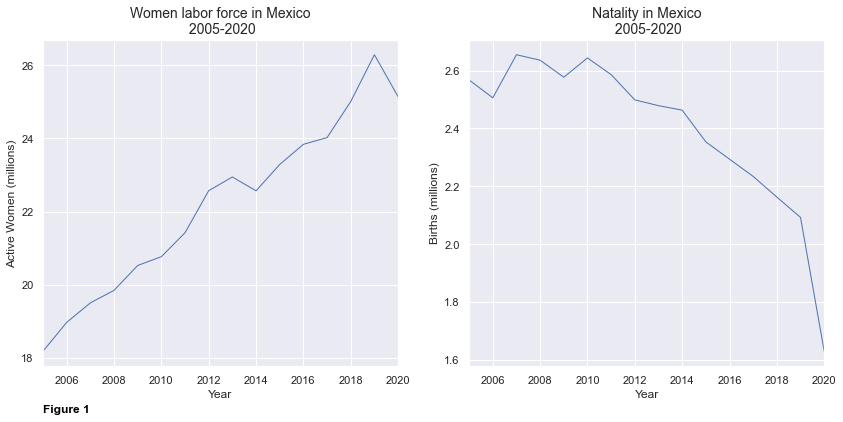

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plt.subplot(1,2,1)
sns.lineplot(data=df1, x=df1.index, y='Active_women', linewidth=1, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Active Women (millions)')
plt.title('Women labor force in Mexico\n 2005-2020', fontsize=14)
plt.yticks([18,20,22,24,26])
plt.xlim(2005,2020)
plt.text(2005, 16.5, "Figure 1", horizontalalignment='left', size='medium', color='black', weight='semibold')


plt.subplot(1,2,2)
sns.lineplot(x=df2.index[11:], y=df2['Births'][11:], linewidth=1, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Births (millions)')
plt.title('Natality in Mexico\n 2005-2020', fontsize=14)
plt.xlim(2005,2020)

Pearson correlation: -0.79


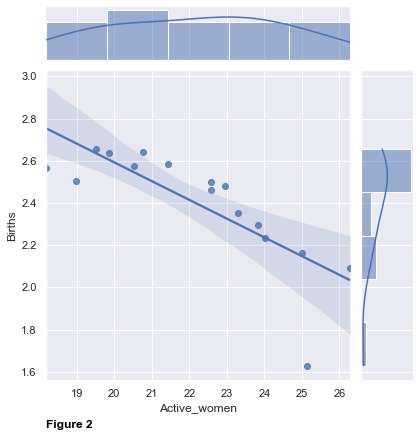

In [29]:
sns.jointplot(x=df1['Active_women'], y=df2['Births'][11:], kind='reg')
plt.text(-63, 1.335, "Figure 2", horizontalalignment='left', size='medium', color='black', weight='semibold')
corr = np.corrcoef(df1['Active_women'], df2['Births'][11:])[0,1]
print('Pearson correlation: {0:.2f}'.format(corr))

### Conclusion
The region to analyze was changed to Mexico to bring some frish air to the assignment. 
The data was downloaded from the oficial INEGI website. Source: https://www.inegi.org.mx/app/descarga/ 

**The goal of this data analysis was to find any kind of correlation between the increase of the women labor force and the decrease of the natality at national level.** 

The INEGI provides updated data of the oficial national census in Mexico. Two CSV files with data until the third quarter of 2021 were downloaded (effective analized data until 2020). The first file contains data regarding of the active people (working people with income). The second file includes information about the natality development. 

After the corresponding data cleaning process we can create a simple line plot showing the data from the last 15 years. The **Figure 1** shows in the left side a constant growth of the women labor force and a dramatic reduction of the natality in the right side. This trend is not something new since it was already known from industialized countries but the countries in development are experimenting the same effect. Especially interesting is the strong drop of the natality in times of pandemic.

It is clear that the increase of the women labor force is not the unique factor to explain the reduction of the natality but we can observe a trend for the correlation. The **Figure 2** shows a scatter plot with a regression visualization. Even if the data per year is not enough to sopport the theory, we can observe a trend to the correlation obtaining a negative Pearson´s number of -0.79.

As additional information even of the Cairo’s principles of beauty, function and insight are considered, the **Figure 1** could give the impression that the natality in Mexico was relative stable until 2010 but this is false since we can not see the data of the previous years. The range of years was selected from 2005 to 2020 due to the available data of the women labor force. In order to align with the Cairo’s principle of truth, the **Figure 3** shows the natality from 1994-2020, confirming the natality reduction even in previos years, in this case in the last 26 years. 

Text(1993, 1.3, 'Figure 3')

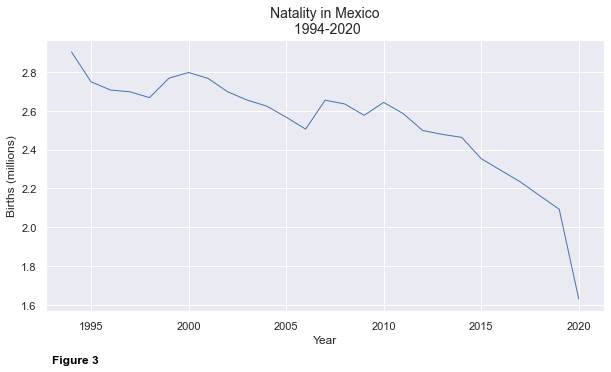

In [30]:
plt.figure(figsize=(10,5))
sns.lineplot(x=df2.index, y=df2['Births'], linewidth=1, linestyle='-')
plt.xlabel('Year')
plt.ylabel('Births (millions)')
plt.title('Natality in Mexico\n 1994-2020', fontsize=14)
plt.text(1993, 1.3, "Figure 3", horizontalalignment='left', size='medium', color='black', weight='semibold')